MNIST - Categorical Classfication

Overfitting Issue

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [6]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


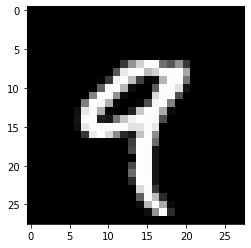

In [7]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [8]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [9]:
# data processing

X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
# 정규화 normalizaation

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [12]:
# One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [13]:
# Model Define

from tensorflow.keras import models
from tensorflow.keras import layers

# 신경망 구조 - Overfitting 
  # Train_loss 와 Validation_loss 의 차이가 크게 발생 
mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
mnist.add(layers.Dense(256, activation = 'relu')) # *
mnist.add(layers.Dense(10, activation = 'softmax'))

# input output 그대로 -> * layers를 없애면 오차범위가 출어든다 

In [15]:
# Model Define

from tensorflow.keras import models
from tensorflow.keras import layers

# Model Capacity
  # Model Capacity Layers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation = 'relu', input_shape = (28*28,)))
mnist.add(layers.Dense(10, activation = 'softmax'))


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# L2 Regularization
  # L2 regularization
mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape=(28*28,)))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Dropout

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
mnist.add(layers.Dropout(0,4))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dropout(0,2))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Batch Normalization

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [15]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
mnist.compile(loss='categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

In [17]:
%%time

Hist_mnist= mnist.fit(X_train, y_train,
                      epochs = 100,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 4ms/step - loss: 0.2625 - accuracy: 0.9231 - val_loss: 0.1499 - val_accuracy: 0.9554
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.9707 - val_loss: 0.1061 - val_accuracy: 0.9724
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0717 - accuracy: 0.9813 - val_loss: 0.0943 - val_accuracy: 0.9756
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9862 - val_loss: 0.1057 - val_accuracy: 0.9742
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9891 - val_loss: 0.0966 - val_accuracy: 0.9773
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9914 - val_loss: 0.1047 - val_accuracy: 0.9767
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9927 - val_loss: 0.1062 - val_accuracy: 0.9778

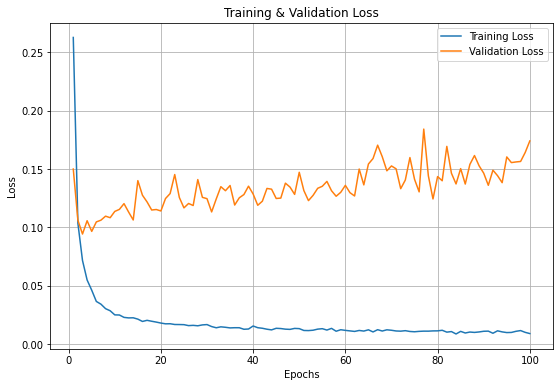

In [18]:
import matplotlib.pyplot as plt

epochs = range(1,len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [19]:
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1594 - accuracy: 0.9777
Loss = 0.15942
Accuracy = 0.97770


In [20]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [29]:
print(mnist.predict_classes(X_test[:1,:]))

[7]
